Import libraries

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro

ML libraries

In [22]:
# --- Model selection utilities ---
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# --- Preprocessing tools ---
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# --- Classification models ---
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# --- Evaluation metrics ---
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report,
    auc,
)

Import and inspect data

In [24]:
df = pd.read_csv('../data/diabetes.csv')
# Create an overview report
def data_overview(df):
    print(" Dataset Shape:")
    print(f"- Rows: {df.shape[0]}")
    print(f"- Columns: {df.shape[1]}\n")

    print(" Columns and Data Types:")
    print(df.dtypes)
    print("\n")

    print(" Missing Values:")
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    if not missing.empty:
        print(missing)
    else:
        print("- No missing values detected!")
    print("\n")

    print(" Basic Info:")
    df.info()

    print("\n Sample of Data:")
    display(df.head())

# Run the report
data_overview(df)

 Dataset Shape:
- Rows: 768
- Columns: 9

 Columns and Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


 Missing Values:
- No missing values detected!


 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-nul

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Descriptive Statitics

In [25]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Distribution

In [26]:
# Set seaborn style and colorblind palette
sns.set(style="whitegrid", palette="colorblind")
sns.set_context('notebook', font_scale=1.2)



# Create one big figure: (rows = number of columns, cols = 3 plots per feature)
fig, axes = plt.subplots(nrows=len(num_cols), ncols=3, figsize=(20, 5 * len(num_cols)))

# Loop through each numeric column and plot
for idx, col in enumerate(num_cols):

    # 1. Histogram with KDE
    sns.histplot(df[col], kde=True, bins=30, ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Histogram of {col}', fontsize=14)
    axes[idx, 0].set_xlabel(col, fontsize=12)
    axes[idx, 0].set_ylabel('Frequency', fontsize=12)

    # Shapiro-Wilk test
    stat, p_value = shapiro(df[col].dropna())
    normality = "Normal" if p_value > 0.05 else "Not Normal"

    # Annotate p-value
    axes[idx, 0].text(0.05, 0.95, f'Shapiro-Wilk p = {p_value:.3f}\n→ {normality}',
                      transform=axes[idx, 0].transAxes,
                      fontsize=10,
                      verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    # 2. Boxplot
    sns.boxplot(x=df[col], ax=axes[idx, 1])
    axes[idx, 1].set_title(f'Boxplot of {col}', fontsize=14)
    axes[idx, 1].set_xlabel(col, fontsize=12)

    # 3. Q-Q plot
    stats.probplot(df[col].dropna(), dist="norm", plot=axes[idx, 2])
    axes[idx, 2].set_title(f'Q-Q Plot of {col}', fontsize=14)

# Make everything tight and clean
plt.tight_layout()

#Save the plot
plt.savefig('../Figures/dist.png')

# Save the BIG figure
plt.show()

# (Optional) Dis

NameError: name 'num_cols' is not defined

Detection of Outliers

In [27]:
# Create a dictionary to store outlier indices per column
outliers_iqr = {}

# Loop over each numeric column
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the outliers
    outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()

    # Save
    outliers_iqr[col] = outlier_indices

# Print number of outliers per column
for feature, indices in outliers_iqr.items():
    print(f'{feature}: {len(indices)} outliers')


Pregnancies: 4 outliers
Glucose: 5 outliers
BloodPressure: 45 outliers
SkinThickness: 1 outliers
Insulin: 34 outliers
BMI: 19 outliers
DiabetesPedigreeFunction: 29 outliers
Age: 9 outliers
Outcome: 0 outliers


**Part Michael done: no features has normal distribution, take outliers with caution due to the zero (e.g. diabetes: outliners are the actual data points)**


Part Tobias start

Visualize Feature Correlations
Pearson Correlation Matrix

In [28]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Heatmap to visualize feature dependencies

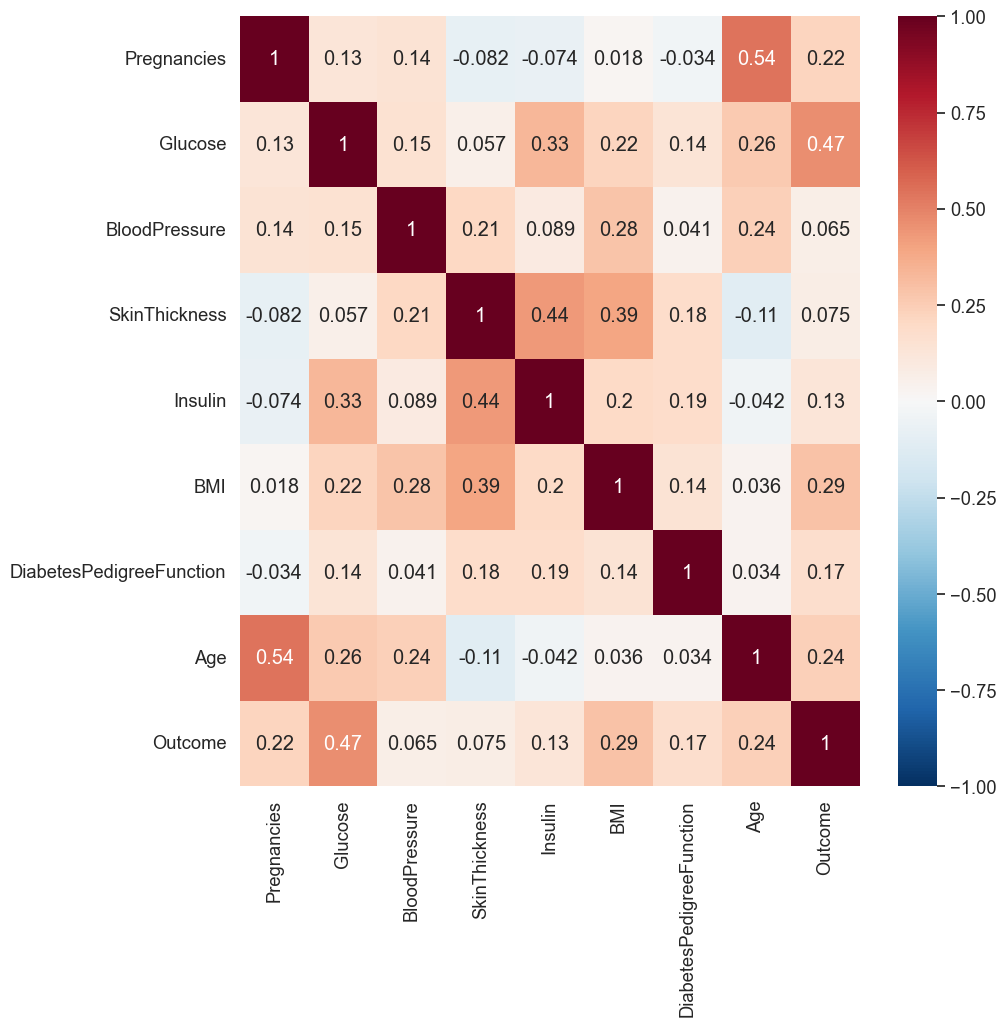

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), vmin=-1.0, center=0, cmap='RdBu_r', annot=True)
plt.show()
plt.savefig('../Figures/corr.png')

Based on the pairwise correlation analysis, the highest correlation observed between predictor features is 0.54, specifically between 'Age' and 'Pregnancies'. While this indicates a moderate positive linear relationship, it falls below the typical thresholds (e.g., ∣r∣>0.7 or 0.8) often used to flag potentially problematic multicollinearity. In conclusion theres no significant redundancy in the features and thus we dont discard any. 

Part Tobias done